In [1]:
import pandas as pd 
import numpy as np


In [2]:
df = pd.read_csv('candyhierarchy2017.csv')

In [3]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [4]:
df = df.rename(columns = {'Q1: GOING OUT?' : 'going_out', 'Q2: GENDER' : 'gender', 'Q3: AGE': 'age', 'Q4: COUNTRY' : 'country',
       'Q5: STATE, PROVINCE, COUNTY, ETC' : 'area', 'Q10: DRESS' : 'dress', 'Q11: DAY': 'day',
       'Q12: MEDIA [Daily Dish]' : 'media_DailyDish', 'Q12: MEDIA [Science]': 'media_Science', 'Q12: MEDIA [ESPN]' : 'media_ESPN',
       'Q12: MEDIA [Yahoo]': 'media_Yahoo'})

In [5]:
df.columns

Index(['Internal ID', 'going_out', 'gender', 'age', 'country', 'area',
       'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'dress', 'Unnamed: 113',
       'day', 'media_DailyDish', 'media_Science', 'media_ESPN', 'media_Yahoo',
       'Click Coordinates (x, y)'],
      dtype='object', length=120)

In [6]:
df['going_out'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [7]:
df = df.dropna(how  = 'all')
df.dropna(thresh = 5 , axis = 0)
df.drop(columns = ['Unnamed: 113','Click Coordinates (x, y)'],inplace = True)

In [8]:
df.shape

(2460, 118)

In [9]:
df['going_out'] = df['going_out'].fillna('Not Sure')

In [11]:
df['gender'].value_counts()

Male                  1467
Female                 839
I'd rather not say      83
Other                   30
Name: gender, dtype: int64

In [12]:
df[df.gender == "I'd rather not say"].shape

(83, 118)

In [13]:
df['gender'] = df['gender'].fillna('I\'d rather not say')
df['gender'].value_counts()

Male                  1467
Female                 839
I'd rather not say     124
Other                   30
Name: gender, dtype: int64

In [14]:
df['country'].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', '35',
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', '46', 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', '45', 'United State', '32',
       'France', 'australia', 'A', 'Can', 'Canae', 'New York',
       'Trumpistan', 'Ireland', 'United Sates', '

In [15]:
df['country'].value_counts(dropna = False).sort_values(ascending = False)

USA                     699
United States           497
usa                     217
Canada                  179
Usa                     139
                       ... 
United kingdom            1
USA USA USA!!!!           1
I don't know anymore      1
France                    1
Fear and Loathing         1
Name: country, Length: 129, dtype: int64

In [16]:
df['country'].isna().sum()

64

In [17]:
df['country'] = df['country'].fillna('Unkown')

In [18]:
df['country']=df['country'].str.lower()
df['country'] = df['country'].str.strip()
df['country'] = df['country'].str.capitalize()
df['country'] = df['country'].str.replace('.','',regex =True)

In [19]:
df.country.value_counts(dropna = False).sort_values(ascending  = False)

Usa                                                                    1138
United states                                                           592
Canada                                                                  224
Us                                                                      194
United states of america                                                 73
                                                                       ... 
Usaa                                                                      1
Canada`                                                                   1
Canae                                                                     1
I pretend to be from canada, but i am really from the united states       1
Fear and loathing                                                         1
Name: country, Length: 93, dtype: int64

In [20]:
df['country'].unique()

array(['Unkown', 'Usa', 'Us', 'Canada', 'Murica', 'United states', 'Uk',
       'United kingdom', 'United staes', 'United states of america',
       'Uae', 'England', 'Mexico', 'Usausausa', 'America', '35', 'France',
       'Finland', 'Unhinged states', 'Us of a', 'Unites states',
       'The united states', 'North carolina', 'Unied states',
       'Netherlands', 'Germany', 'Europe', 'Earth', 'U s', 'Costa rica',
       'The united states of america', 'Unite states', '46', 'Cascadia',
       'Australia', 'Insanity lately', 'Greece',
       'Usa? hard to tell anymore', "'merica", 'Usas', 'Pittsburgh', '45',
       'United state', '32', 'A', 'Can', 'Canae', 'New york',
       'Trumpistan', 'Ireland', 'United sates', 'Korea', 'California',
       'Japan', 'South africa',
       'I pretend to be from canada, but i am really from the united states',
       'Iceland', 'Canada`', 'Scotland', 'Denmark', 'United stated',
       'Switzerland', 'Ahemamerca', 'Ud', 'South korea', 'New jersey',
   

In [21]:
places = np.array(['United states of america','Usa','Canada','England','Uk','Unknown','Uae','Mexico','France','Finland','Netherlands','Germany'
         ,'Europe','costa rica','Australia','Greece','Ireland','Korea','South africa','Scotland','Denmark','Switzerland','Indonesia',
         'Singapor','China','Taiwan','Hong kong','Spain','Sweeden'])

In [22]:
ser = pd.DataFrame({'countries':places})

In [23]:
from fuzzywuzzy import process

C:\Users\FIRST\AppData\Local\Programs\Python\Python310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [24]:
for state in ser['countries']:
    match = process.extract(state , df['country'] , limit  = df.shape[0])
    for potential_match in match :
        if potential_match[1] >=80 :
            df.loc[df['country'] == potential_match[0] , 'country'] = state
    

In [25]:
filt = df['country'].str.isdigit()==True
df.loc[filt,'country'] = 'Unknown'

In [26]:
df['country'].unique()

array(['Unknown', 'Usa', 'Canada', 'Murica', 'United states of america',
       'Uk', 'Uae', 'England', 'Mexico', 'France', 'Finland',
       'North carolina', 'Netherlands', 'Germany', 'Europe', 'Earth',
       'costa rica', 'Cascadia', 'Australia', 'Insanity lately', 'Greece',
       'Usa? hard to tell anymore', 'Pittsburgh', 'Canae', 'New york',
       'Trumpistan', 'Ireland', 'Korea', 'California', 'Japan',
       'South africa', 'Scotland', 'Denmark', 'Switzerland', 'Ahemamerca',
       'Ud', 'New jersey', 'Indonesia', 'Atlantis', 'Murrika', 'Alaska',
       'Soviet canuckistan', 'Singapor', 'China', 'Taiwan', 'Hong kong',
       'Spain', 'Sweeden', 'Narnia', 'U s a',
       'Subscribe to dm4uz3 on youtube', "I don't know anymore",
       'Fear and loathing'], dtype=object)

In [27]:
states_in_america  = np.array(['North carolina','New york','Trumpistan','Ahemamerca','New jersey','Murrika','Alaska'
                              ,'U s a','Pittsburgh','Usa? hard to tell anymore','California','Murica','Cascadia'])
unknown_places = np.array(['Earth','Atlantis','Ud','Soviet canuckistan','Subscribe to dm4uz3 on youtube',
                          'I don\'t know anymore','Fear and loathing','Insanity lately','Narnia'])

In [28]:
df['country'] = df['country'].replace(to_replace = states_in_america,value = 'Usa')
df['country'] = df['country'].replace(to_replace = unknown_places,value = 'Unknown')
df['country'] = df['country'].str.replace("Canae",'Canada')

In [29]:
df.loc[df['country'] == 'Usa? hard to tell anymore','country'] = 'Usa'

In [30]:
df['country']=df['country'].str.replace('United states of america','Usa')
df['country'].unique()

array(['Unknown', 'Usa', 'Canada', 'Uk', 'Uae', 'England', 'Mexico',
       'France', 'Finland', 'Netherlands', 'Germany', 'Europe',
       'costa rica', 'Australia', 'Greece', 'Ireland', 'Korea', 'Japan',
       'South africa', 'Scotland', 'Denmark', 'Switzerland', 'Indonesia',
       'Singapor', 'China', 'Taiwan', 'Hong kong', 'Spain', 'Sweeden'],
      dtype=object)

In [31]:
other = [x for x in df.country.unique()]
other.remove('Usa')
other.remove('Canada')

In [32]:
df['country'] = df['country'].replace(to_replace=other , value = 'Other')

In [33]:
df['country'].unique()

array(['Other', 'Usa', 'Canada'], dtype=object)

In [34]:
df['age'].unique()

array([nan, '44', '49', '40', '23', '53', '33', '43', '56', '64', '37',
       '59', '48', '54', '36', '45', '25', '34', '35', '38', '58', '50',
       '47', '16', '52', '63', '65', '41', '27', '31', '61', '46', '42',
       '62', '29', '39', '32', '28', '69', '67', '30', '22', '26', '51',
       '70', '24', '18', '19', 'Old enough', '57', '60', '66', '12',
       'Many', '55', '72', '?', '21', '11', 'no', '9', '68', '20', '6',
       '10', '71', '90', '13', '45-55', '312', '99', '7', 'hahahahaha',
       '88', '39٫4', '74', '102', 'older than dirt', '17', '15', '8',
       '75', '5u', 'Enough', 'See question 2', '24-50', '14', 'Over 50',
       '100', '76', '1000', 'sixty-nine', '46 Halloweens.', 'ancient',
       '77', 'OLD', 'old', '73', '70 1/2', '1', 'MY NAME JEFF', '4',
       '59 on the day after Halloween', 'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [35]:
df['age'] = pd.to_numeric(df['age'],errors = 'coerce')

In [37]:
filt9 = (df['age'] >=130) | (df['age'] < 1) 
df.loc[filt9,'age'] = np.nan

In [38]:
age_mean = df['age'].mean()
df['age']  = df['age'].fillna(age_mean)
df['age'] = df['age'].astype('int')

In [39]:
df['age'].unique()

array([ 42,  44,  49,  40,  23,  53,  33,  43,  56,  64,  37,  59,  48,
        54,  36,  45,  25,  34,  35,  38,  58,  50,  47,  16,  52,  63,
        65,  41,  27,  31,  61,  46,  62,  29,  39,  32,  28,  69,  67,
        30,  22,  26,  51,  70,  24,  18,  19,  57,  60,  66,  12,  55,
        72,  21,  11,   9,  68,  20,   6,  10,  71,  90,  13,  99,   7,
        88,  74, 102,  17,  15,   8,  75,  14, 100,  76,  77,  73,   1,
         4])

In [40]:
df = df.astype({'going_out':'category', 'gender':'category', 'country':'category', 'dress':'category', 'day':'category'})

In [41]:
df.describe(include = 'category')

,going_out,gender,country,dress,day
count,2460,2460,2460,1716,1735
unique,3,4,3,2,2
top,No,Male,Usa,White and gold,Friday
freq,2038,1467,2065,1081,1091


In [42]:
data = df[df.columns[-4:]]

In [43]:
data.head()

,media_DailyDish,media_Science,media_ESPN,media_Yahoo
0,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN
4,NaN,1.0,NaN,NaN


In [44]:
def melt(row):
    for c in data.columns:
        if row[c]==1:
            return c

In [45]:
new_col = data.apply(melt,axis = 1)

In [46]:
df['media_preference'] = new_col

In [47]:
df['media_preference'] = df['media_preference'].fillna('unknown')
df['media_preference'].unique()

array(['unknown', 'media_Science', 'media_DailyDish', 'media_Yahoo',
       'media_ESPN'], dtype=object)

In [48]:
df.drop(columns = ['media_DailyDish','media_Science','media_ESPN','media_Yahoo'],inplace =True)

In [49]:
df['media_preference'].value_counts(dropna = False)

media_Science      1362
unknown             847
media_ESPN           99
media_DailyDish      85
media_Yahoo          67
Name: media_preference, dtype: int64

In [50]:
df_options = [i for i in df.columns if 'Q6' in i ]

In [51]:
other_questions = [i for i in df.columns if 'Q7' in i or 'Q8' in i or 'Q9' in i]

In [52]:
other_questions

['Q7: JOY OTHER', 'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS']

In [53]:
response = len(df_options) - df[df_options].isna().sum(axis = 1)

In [54]:
df['response'] = response

In [55]:
for c in other_questions:
    df[c] = df[c].fillna('UNKNOWN')

In [56]:
df['dress'] = df['dress'].astype('string')
df['dress']= df['dress'].fillna('Unknown')
df['dress']= df['dress'].astype('category')

In [57]:
df['day'] = df['day'].astype('string')
df['day']= df['day'].fillna('Unknown')
df['day']= df['day'].astype('category')

In [58]:
df['area'] = df['area'].fillna('Unkown')

In [59]:
candy_data = pd.DataFrame(df[df_options])

In [60]:
candy_data

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,...,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,...,MEH,MEH,JOY,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,MEH
2456,MEH,DESPAIR,JOY,NaN,NaN,NaN,NaN,DESPAIR,DESPAIR,JOY,...,MEH,MEH,DESPAIR,JOY,NaN,NaN,JOY,DESPAIR,MEH,JOY
2457,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,...,JOY,JOY,MEH,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH
2458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

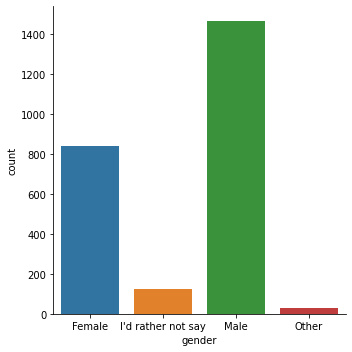

In [65]:
sns.catplot(x='gender' , data = df , kind = 'count')

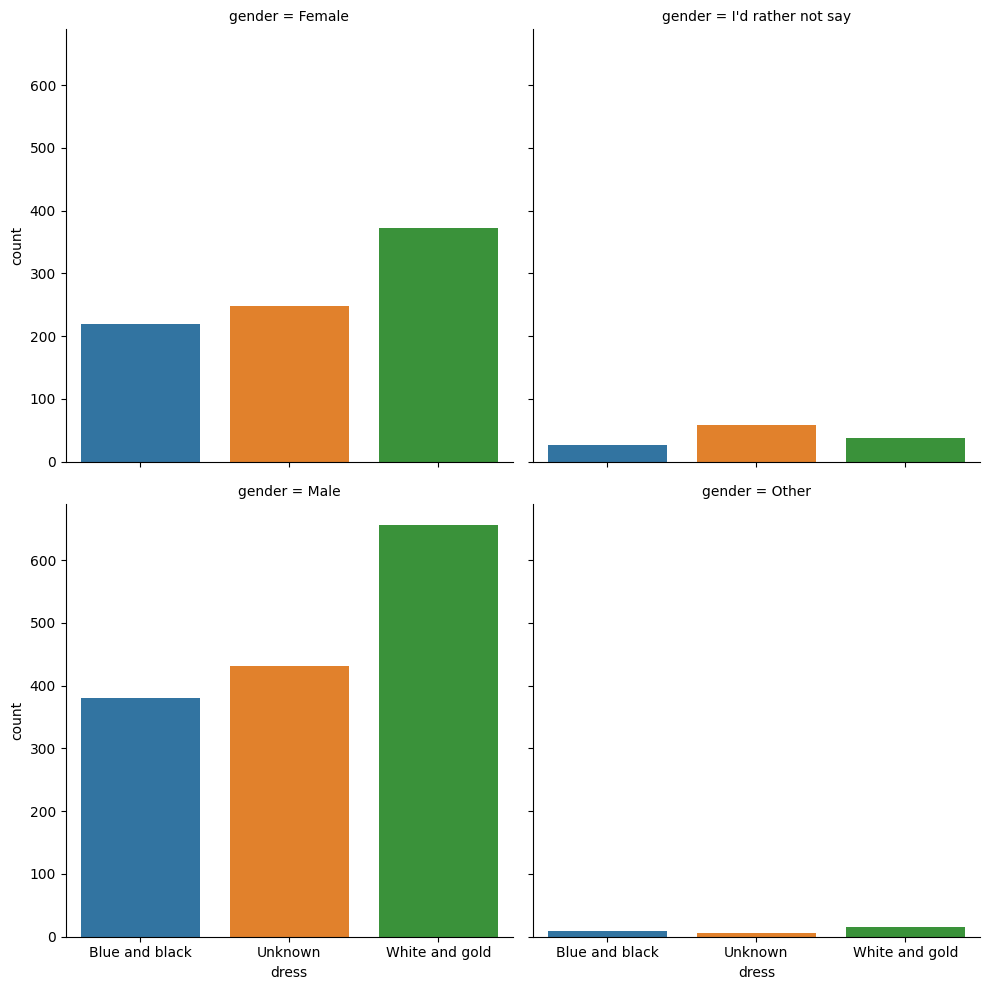

In [70]:
sns.catplot(x = 'dress'  , data = df , kind = 'count' , col = 'gender' , col_wrap = 2)
plt.show()

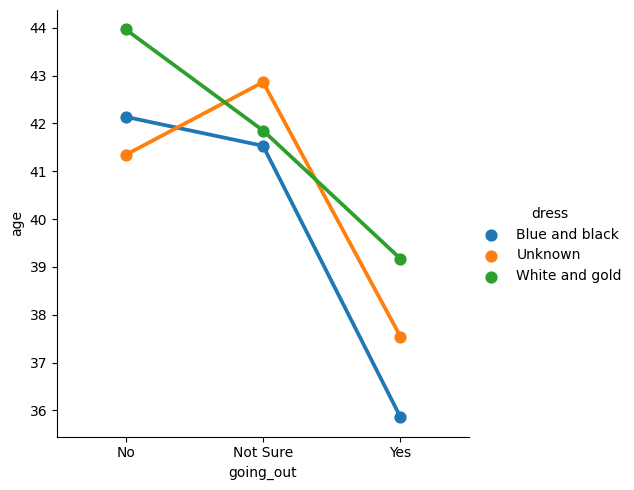

In [74]:
sns.catplot(y= 'age' , x = 'going_out' , data = df , kind = 'point' , hue = 'dress' , ci = None)

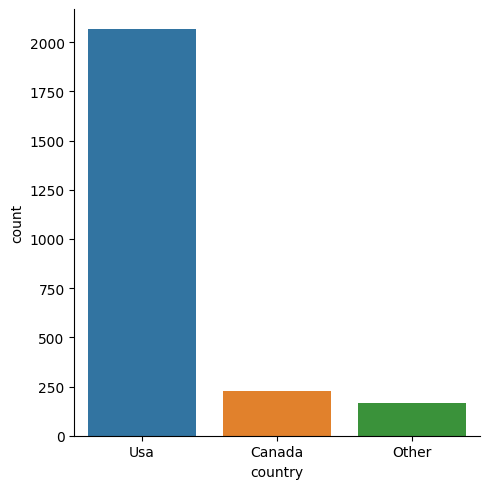

In [78]:
sns.catplot(x= 'country' , data = df  , kind = 'count' , order = ['Usa', 'Canada','Other'])
